## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
#LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95
MOMENTUM = [0.95,0.75,0.5,0.1,0.01]
nesterov=[True,False]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s , nesterov-%s" % (str(mom),str(True))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

50000/50000 [==============================] - 14s 283us/step - loss: 0.3963 - accuracy: 0.8577 - val_loss: 2.1513 - val_accuracy: 0.5227
Epoch 49/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.4022 - accuracy: 0.8543 - val_loss: 2.2315 - val_accuracy: 0.5145
Epoch 50/50
50000/50000 [==============================] - 15s 291us/step - loss: 0.3770 - accuracy: 0.8645 - val_loss: 2.3145 - val_accuracy: 0.5183
Experiment with MOMENTUM = 0.750000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________

50000/50000 [==============================] - 14s 285us/step - loss: 0.8311 - accuracy: 0.7088 - val_loss: 1.6261 - val_accuracy: 0.4898
Epoch 46/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.8273 - accuracy: 0.7109 - val_loss: 1.5724 - val_accuracy: 0.4980
Epoch 47/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.8108 - accuracy: 0.7160 - val_loss: 1.4645 - val_accuracy: 0.5335
Epoch 48/50
50000/50000 [==============================] - 16s 313us/step - loss: 0.7970 - accuracy: 0.7219 - val_loss: 1.4625 - val_accuracy: 0.5272
Epoch 49/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.7767 - accuracy: 0.7267 - val_loss: 1.4736 - val_accuracy: 0.5281
Epoch 50/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.7714 - accuracy: 0.7315 - val_loss: 1.6507 - val_accuracy: 0.4920
Experiment with MOMENTUM = 0.500000
Model: "model_1"
___________________________________________________________

50000/50000 [==============================] - 14s 284us/step - loss: 1.1103 - accuracy: 0.6105 - val_loss: 1.4726 - val_accuracy: 0.4856
Epoch 43/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.1003 - accuracy: 0.6160 - val_loss: 1.3708 - val_accuracy: 0.5219
Epoch 44/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.0941 - accuracy: 0.6171 - val_loss: 1.3814 - val_accuracy: 0.5029
Epoch 45/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.0909 - accuracy: 0.6176 - val_loss: 1.4334 - val_accuracy: 0.4944
Epoch 46/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.0767 - accuracy: 0.6225 - val_loss: 1.4072 - val_accuracy: 0.5075
Epoch 47/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.0617 - accuracy: 0.6276 - val_loss: 1.3689 - val_accuracy: 0.5226
Epoch 48/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.0552 - accuracy: 0.6304 - va

50000/50000 [==============================] - 15s 291us/step - loss: 1.2945 - accuracy: 0.5453 - val_loss: 1.4115 - val_accuracy: 0.4976
Epoch 40/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.2850 - accuracy: 0.5484 - val_loss: 1.4721 - val_accuracy: 0.4770
Epoch 41/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.2760 - accuracy: 0.5507 - val_loss: 1.3974 - val_accuracy: 0.5027
Epoch 42/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.2668 - accuracy: 0.5552 - val_loss: 1.4053 - val_accuracy: 0.4987
Epoch 43/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.2537 - accuracy: 0.5586 - val_loss: 1.3518 - val_accuracy: 0.5224
Epoch 44/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.2503 - accuracy: 0.5616 - val_loss: 1.5332 - val_accuracy: 0.4556
Epoch 45/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.2542 - accuracy: 0.5600 - va

50000/50000 [==============================] - 14s 282us/step - loss: 1.3283 - accuracy: 0.5340 - val_loss: 1.4929 - val_accuracy: 0.4694
Epoch 37/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.3231 - accuracy: 0.5369 - val_loss: 1.4342 - val_accuracy: 0.4900
Epoch 38/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.3219 - accuracy: 0.5358 - val_loss: 1.4425 - val_accuracy: 0.4884
Epoch 39/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.3115 - accuracy: 0.5402 - val_loss: 1.4841 - val_accuracy: 0.4818
Epoch 40/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.2991 - accuracy: 0.5455 - val_loss: 1.5306 - val_accuracy: 0.4588
Epoch 41/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.2960 - accuracy: 0.5464 - val_loss: 1.4584 - val_accuracy: 0.4860
Epoch 42/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.2870 - accuracy: 0.5484 - va

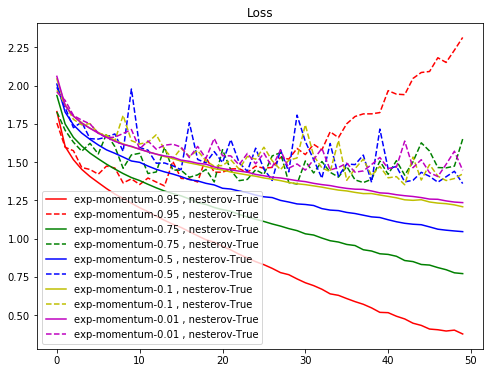

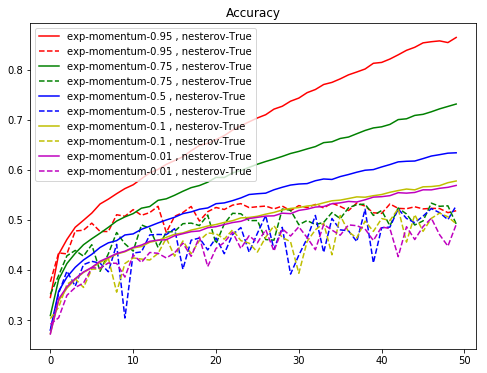

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()